In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [2]:
# datagen=ImageDataGenerator(rescale=(1/255))
train_data,val_data = tf.keras.utils.image_dataset_from_directory(
    'apple',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # data_format=None,
    verbose=True,
)

Found 3172 files belonging to 4 classes.
Using 2538 files for training.
Using 634 files for validation.


In [14]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# model.add( BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# model.add( BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512,activation='relu' , kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
model.add(tf.keras.layers.Dense(units=256,activation='relu' , kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [5]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 10,586,436 (40.38 MB)

 Trainable params: 10,586,436 (40.38 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history  = model.fit(x = train_data , validation_data = val_data , epochs =10,callbacks=[early_stopping])

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 410s 5s/step - accuracy: 0.5013 - loss: 1.7225 - val_accuracy: 0.8281 - val_loss: 0.9424
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 409s 5s/step - accuracy: 0.7548 - loss: 1.0751 - val_accuracy: 0.8849 - val_loss: 0.8906
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 400s 5s/step - accuracy: 0.8388 - loss: 0.8619 - val_accuracy: 0.8833 - val_loss: 0.7427
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 400s 5s/step - accuracy: 0.8504 - loss: 0.8171 - val_accuracy: 0.9085 - val_loss: 0.6726
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.9013 - loss: 0.6915 - val_accuracy: 0.8612 - val_loss: 0.7762
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.8853 - loss: 0.7190 - val_accuracy: 0.9338 - val_loss: 0.5779
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.9306 - loss: 0.5784 - val_accuracy: 0.9369 - val_loss: 0.5534
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.9453 - loss: 0.5223 - val_accuracy: 0.9353 - v

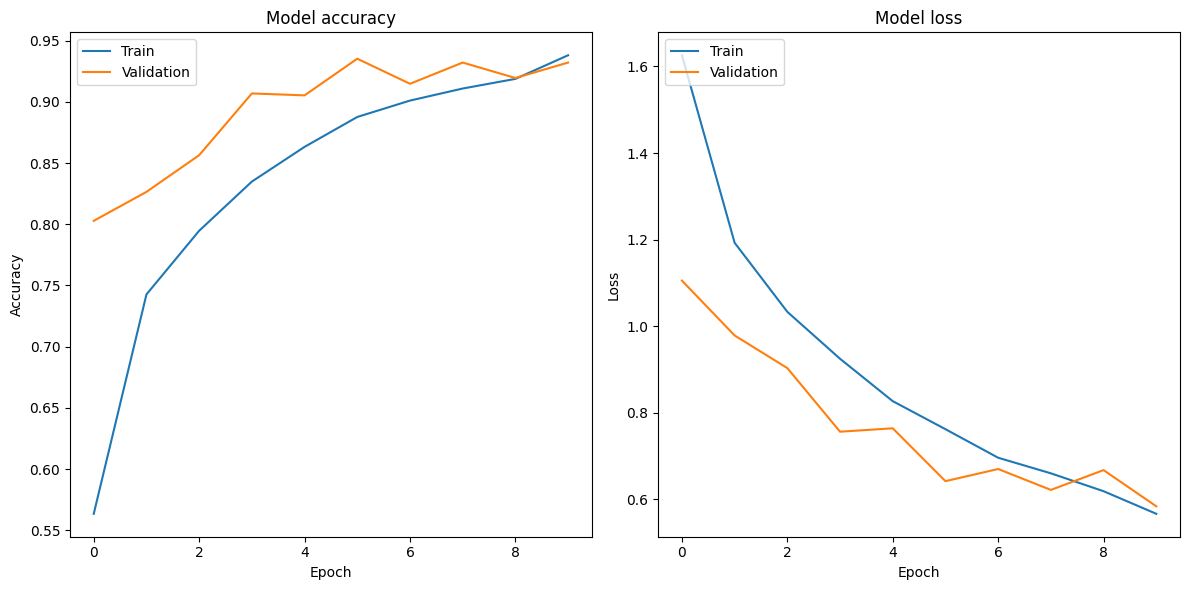

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
model.evaluate(val_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9335 - loss: 0.5870


[0.5840160846710205, 0.9321766495704651]

In [11]:
model.save("apple_model.keras")

In [12]:
import json
with open("appel_hist01.json","w") as f:
    json.dump(history.history , f)

In [13]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy']